In [113]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


df=pd.DataFrame(pd.read_csv("Customer Churn.csv"))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [114]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [116]:
df["customerID"].duplicated().sum()

0

we have converted the value of 0 to No and 1 to Yes as understable for all

In [117]:
def cov(value):
  if value==0:
    return "No"
  else:
    return "yes"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(cov)


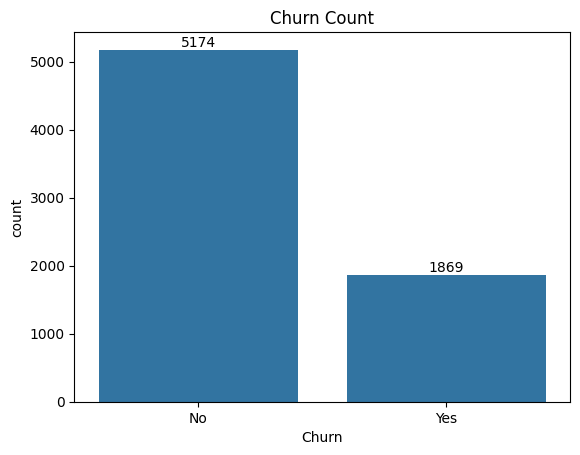

In [118]:
ax=sns.countplot(df,x="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn Count")
plt.show()

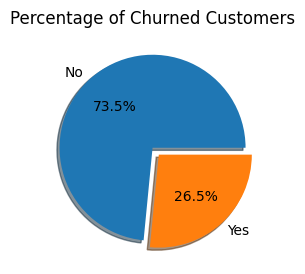

In [ ]:
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.figure(figsize=(3,4))
plt.pie(gb["Churn"],labels=gb.index,autopct="%.1f%%",shadow=True,explode=[0,0.1])
plt.title("Percentage of Churned Customers")
plt.show()

From the Above Pie Chart we can conclude that the 26.5% of our Customer have Churned Out.

Now let's explore the reason behind it

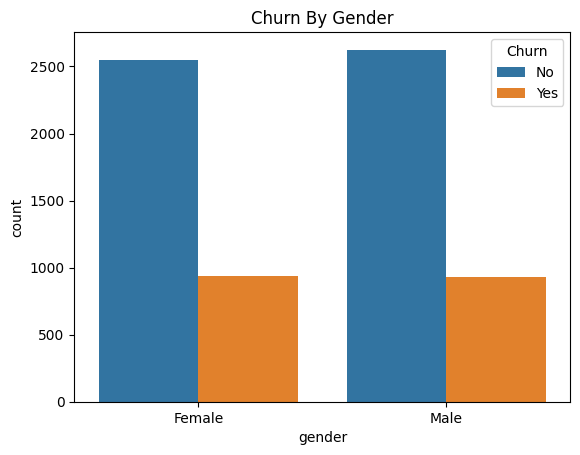

In [119]:
bx=sns.countplot(df,x="gender",hue="Churn")
plt.title("Churn By Gender")
plt.show()

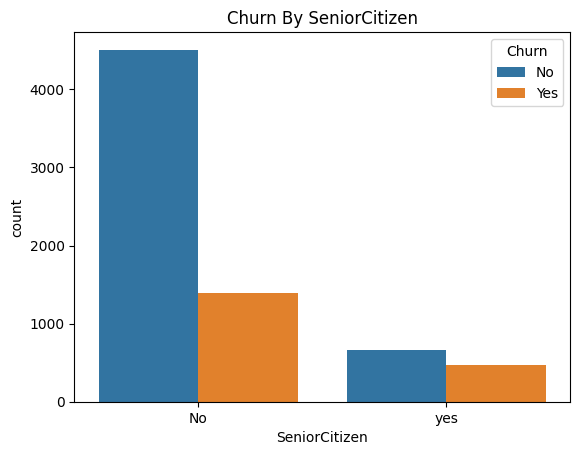

In [ ]:
sns.countplot(df,x="SeniorCitizen",hue="Churn",)
plt.title("Churn By SeniorCitizen")
plt.show()

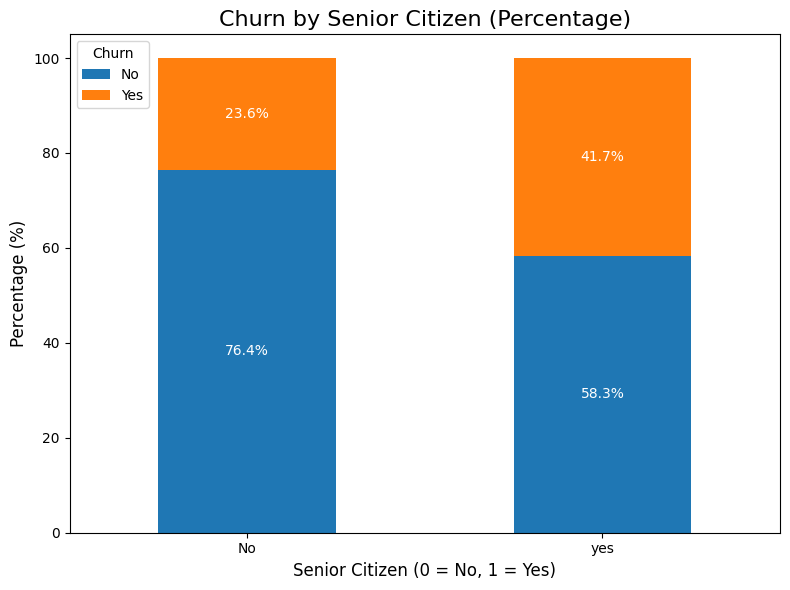

In [ ]:
total_counts = df.groupby("SeniorCitizen")["Churn"].count()  # Total counts per SeniorCitizen category
churn_counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)  # Counts for Churn and No Churn
churn_percent = churn_counts.div(total_counts, axis=0) * 100  # Calculate percentages

# Plot a stacked bar chart
ax = churn_percent.plot(kind="bar", stacked=True, figsize=(8, 6))

# Add annotations
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Avoid annotations on empty bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color="white"
            )

# Customizing the plot
plt.title("Churn by Senior Citizen (Percentage)", fontsize=16)
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Churn", loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

comparatively highest percent of senior citizen have churned out

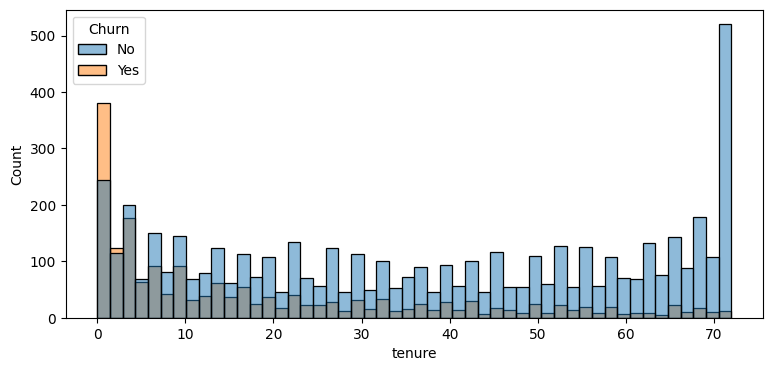

In [84]:
plt.figure(figsize=(9,4))
sns.histplot(df,x="tenure",bins=50,hue="Churn")
plt.show()

people who have used our services for Long time Stayed and who used for some time churned

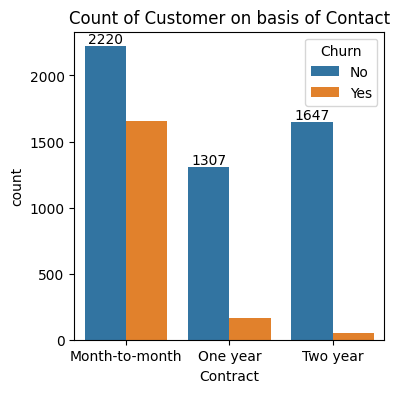

In [120]:
plt.figure(figsize=(4,4))
ax=sns.countplot(df,x="Contract",hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer on basis of Contact")
plt.show()

People Who have Month to Month Contract have Churned Out And People with One Year or More Contract Stayed

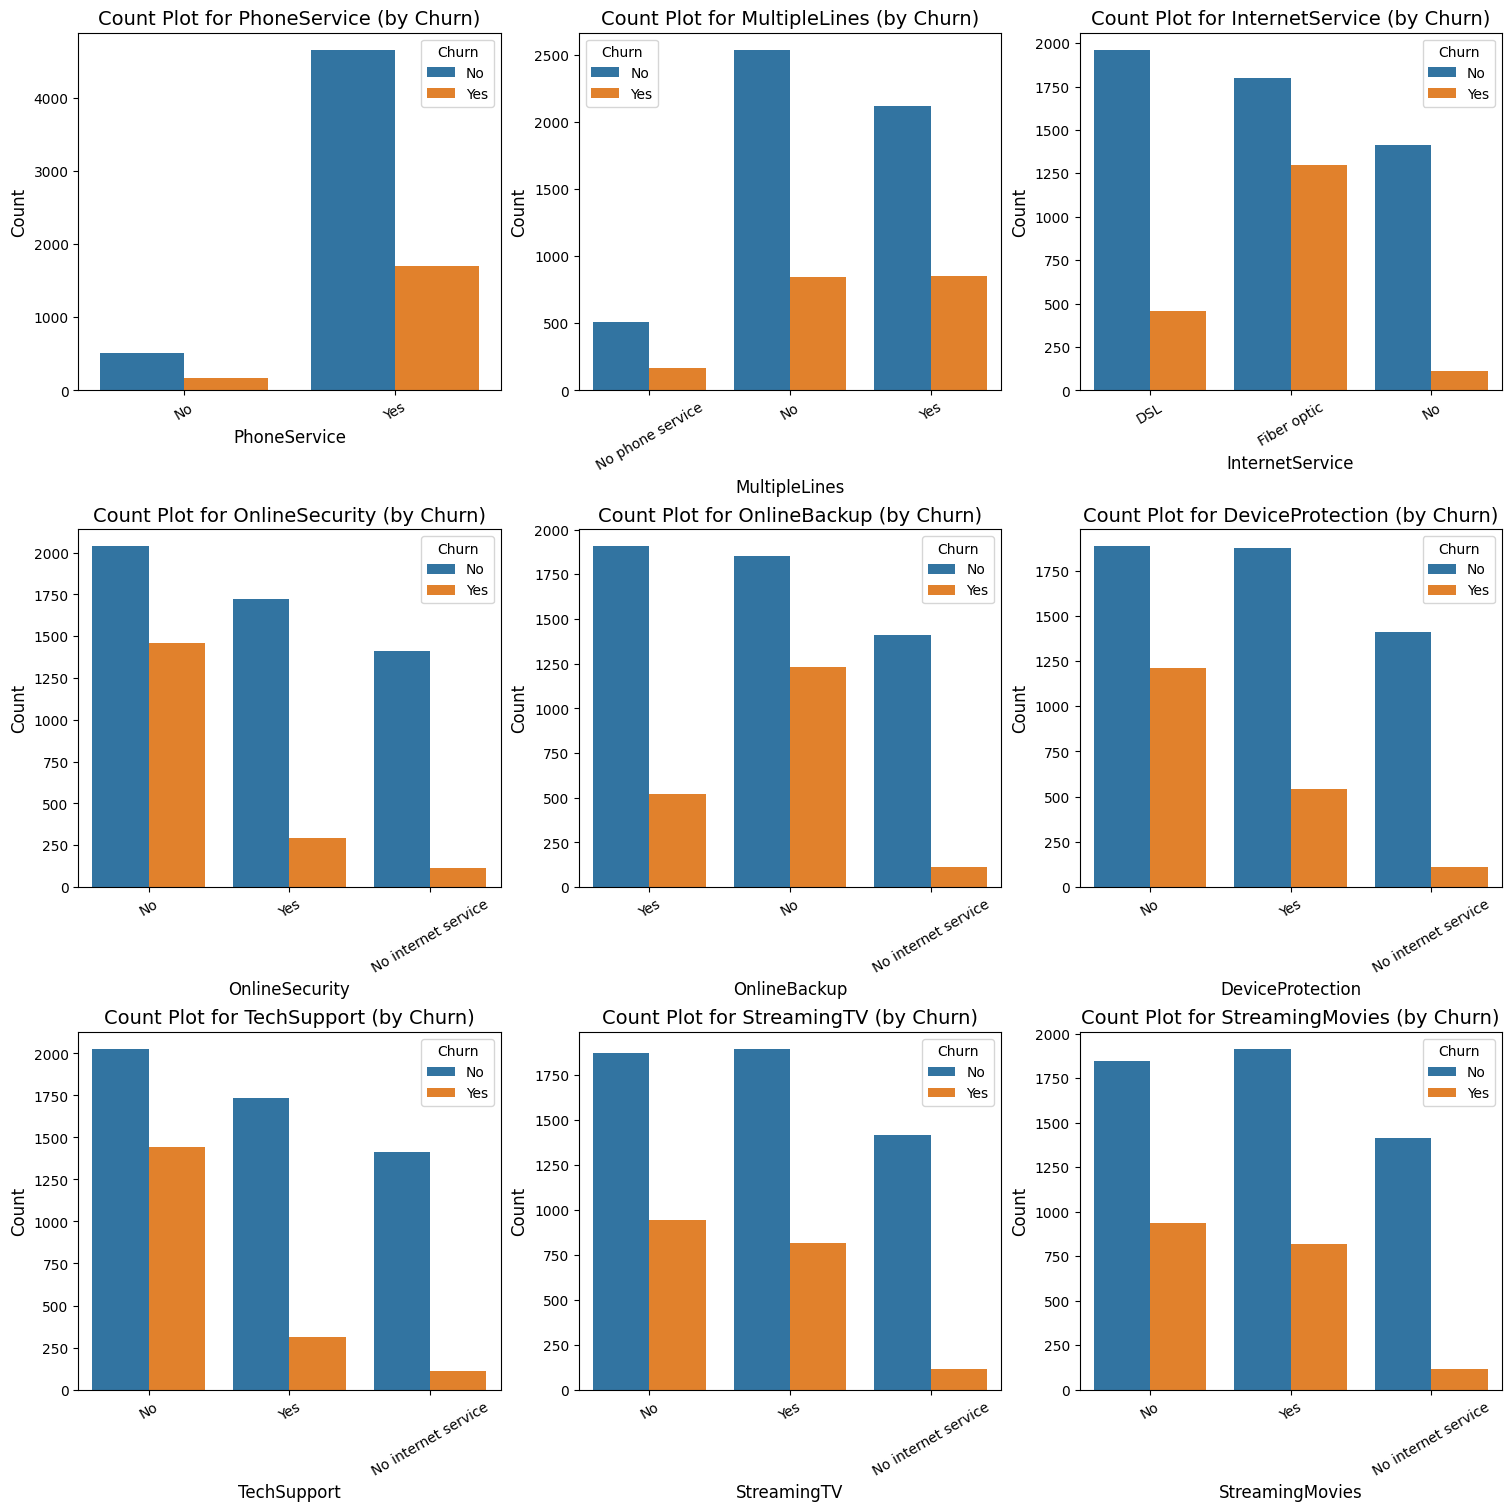

In [121]:
columns_to_plot = [
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

# Create subplots
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(columns_to_plot) // n_cols)  # Calculate rows needed (ceiling division)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.countplot(df, x=col, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(f"Count Plot for {col} (by Churn)", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

The Majority of customers who do not churn tend to have services like phoneServices, Internet Services (particularly DSL) and online Security enabled.
For Services like Online Backup, Techsupport and streming Tv, Churn rate are noticeably higher when these services are not used or are not available








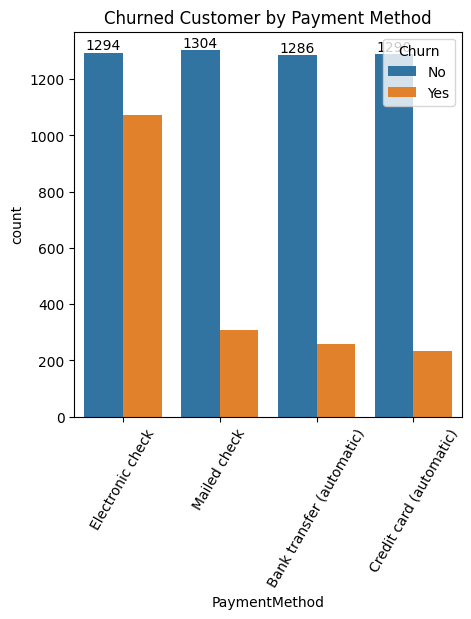

In [134]:
plt.figure(figsize=(5,5))
ax=sns.countplot(df,x="PaymentMethod",hue="Churn")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=60)
plt.title("Churned Customer by Payment Method")
plt.show()

customers likely Churn when he is using Electronic Check as a payment Method